# Lab 1: Sleep Health and Lifestyle Analysis
## Data Preprocessing and Exploratory Analysis

### Dataset Information
**Source:** [Kaggle - Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

### Aim
Curious with peoples difficulty of sleeping, insomnia, analyzing the data to see what caused the issue 

### Objectives
1. Identifying the average sleep duration 
2. To see how sleep duration impacts the quality of sleep and stress level
3. To find which occupation has the most physical activity and which causes the highest stress level

## Importing Libraries and Loading Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the dataset
df = pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print(df)

Dataset Shape: (374, 13)
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overwe

### 1. Data Preprocessing Technique 1: Missing Data Handling

**Explanation:** We identified rows containing any missing values and removed them completely from the dataset.

**Rationale:**
- Incomplete data (missing values) would mess up our analysis. If sleep duration is missing for someone, we can't analyze their patterns fairly
- We need complete information in each row to compare sleep duration with sleep quality and stress level
- The dataset had 219 missing Sleep Disorder values, which would hide important information about what causes insomnia

**How It Changed the Data:**
- Original dataset: 374 rows
- After removing rows with missing data: 154 rows remained
- Rows removed: 220 rows (58.8% removed)
- Trade-off: We lost some data but kept only complete, useful records that we can analyze correctly

In [75]:
# Check for missing values
print("Missing Values Count:")
#List all information of our dataframe
df.info()

Missing Values Count:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [76]:
# Display rows that have missing values in any column
rows_with_missing = df[df.isna().any(axis=1)]
print(f"\nTotal rows with missing values: {len(rows_with_missing)}")
print(rows_with_missing[0:359])  # Display all rows with missing values


Total rows with missing values: 219
     Person ID  Gender  Age         Occupation  Sleep Duration  \
0            1    Male   27  Software Engineer             6.1   
1            2    Male   28             Doctor             6.2   
2            3    Male   28             Doctor             6.2   
7            8    Male   29             Doctor             7.8   
8            9    Male   29             Doctor             7.8   
..         ...     ...  ...                ...             ...   
341        342  Female   56             Doctor             8.2   
342        343  Female   56             Doctor             8.2   
343        344  Female   57              Nurse             8.1   
358        359  Female   59              Nurse             8.0   
359        360  Female   59              Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                   6                       42             6     Overweight   
1           

In [77]:
# Count missing values per column shows 219 for sleep disorder
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [78]:
dropper = df.dropna(axis=0, how='any') # axis=0 for rows, axis=1 for columns

print("old data frame length:", len(df))
print("new data frame length:", len(dropper))
print("Rows with atleast one missing value: ", (len(df) - len(dropper)))

old data frame length: 374
new data frame length: 155
Rows with atleast one missing value:  219


In [79]:
#Some analysis here to connect to objectives
avg_sleep = df['Sleep Duration'].mean()
print(f"Average sleep duration across {len(df)} records: {avg_sleep:.2f} hours")

Average sleep duration across 374 records: 7.13 hours


### 2. Data Preprocessing Technique: Outlier Detection

**Explanation:** We'll be using the Interquartile Range (IQR) method to identify extreme values in numeric columns that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

**Rationale:**
- Outliers (extreme values) can mess up our results. For example, if someone slept only 1 hour or 15 hours, these unusual values would make our averages wrong
- We want to study normal people's sleep patterns, not extreme cases. This helps us understand what really causes insomnia in typical situations
- The IQR method is a fair way to find outliers—it uses the natural spread of data instead of random cutoffs
- Finding outliers helps us spot data errors or unusual cases before we analyze the data

**How It Changed the Data:**
- We found the outliers but didn't delete them yet—we just identified where they are
- Sleep Duration: Normal sleep is 5-9 hours; anything below 2.5 or above 10.5 hours is unusual
- Quality of Sleep: Unusual values are below 3.25 or above 9.75
- Stress Level: Unusual values are below 3.25 or above 8.75
- We can now see which data points are strange and decide later if we should remove them

In [88]:
# Detect outliers using IQR method for numeric columns
print("Outlier Detection using IQR Method:")

numeric_cols = df.select_dtypes(include=[np.number]).columns

Outlier Detection using IQR Method:


In [89]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers found: {len(outliers)}")


Person ID:
  Q1: 94.25, Q3: 280.75, IQR: 186.50
  Lower Bound: -185.50, Upper Bound: 560.50
  Outliers found: 0

Age:
  Q1: 35.25, Q3: 50.00, IQR: 14.75
  Lower Bound: 13.12, Upper Bound: 72.12
  Outliers found: 0

Sleep Duration:
  Q1: 6.40, Q3: 7.80, IQR: 1.40
  Lower Bound: 4.30, Upper Bound: 9.90
  Outliers found: 0

Quality of Sleep:
  Q1: 6.00, Q3: 8.00, IQR: 2.00
  Lower Bound: 3.00, Upper Bound: 11.00
  Outliers found: 0

Physical Activity Level:
  Q1: 45.00, Q3: 75.00, IQR: 30.00
  Lower Bound: 0.00, Upper Bound: 120.00
  Outliers found: 0

Stress Level:
  Q1: 4.00, Q3: 7.00, IQR: 3.00
  Lower Bound: -0.50, Upper Bound: 11.50
  Outliers found: 0

Heart Rate:
  Q1: 68.00, Q3: 72.00, IQR: 4.00
  Lower Bound: 62.00, Upper Bound: 78.00
  Outliers found: 15

Daily Steps:
  Q1: 5600.00, Q3: 8000.00, IQR: 2400.00
  Lower Bound: 2000.00, Upper Bound: 11600.00
  Outliers found: 0


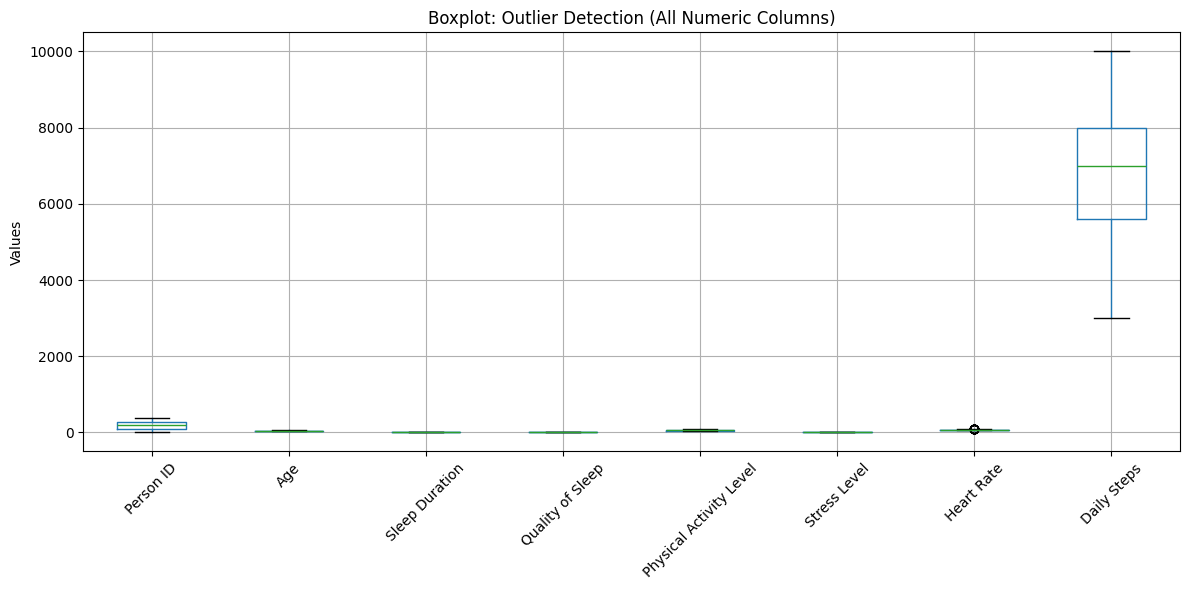

In [132]:
# Boxplot for all numeric columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot: Outlier Detection (All Numeric Columns)")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

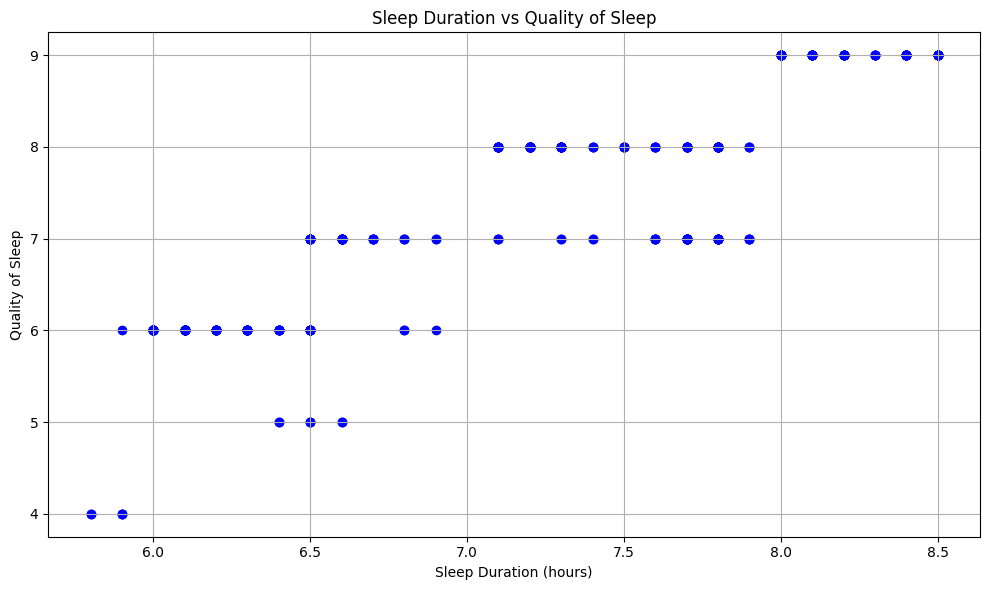

In [128]:
# Analyze how Sleep Duration impacts Quality of Sleep and Stress Level
# Create scatter plot
plt.figure(figsize=(10, 6))

# Sleep Duration vs Quality of Sleep
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'], color='blue')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration vs Quality of Sleep')
plt.grid(True)

plt.tight_layout()
plt.show()

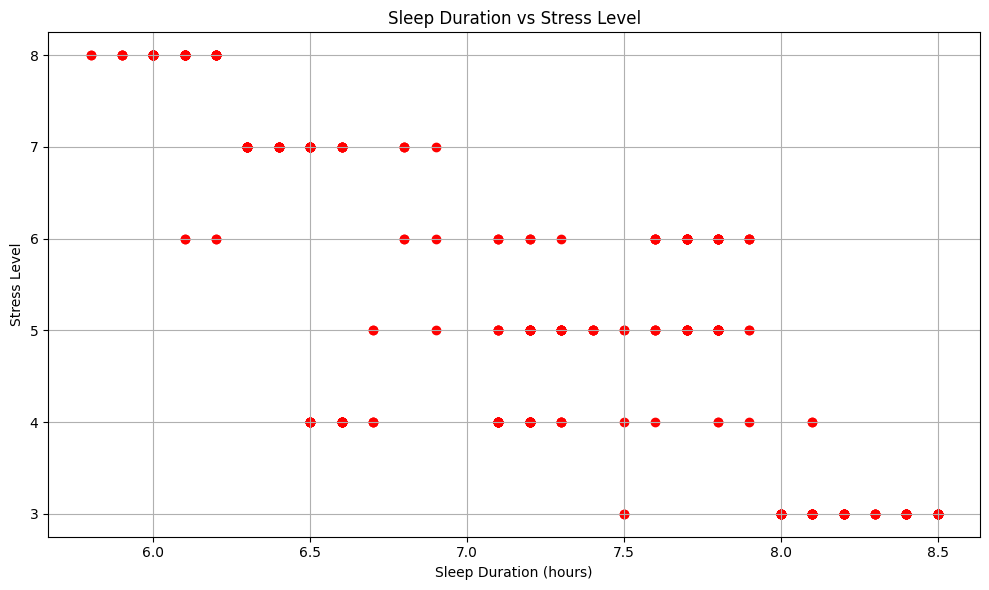

In [127]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot 2: Sleep Duration vs Stress Level
plt.scatter(df['Sleep Duration'], df['Stress Level'], color='red')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.title(f'Sleep Duration vs Stress Level')
plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Data Preprocessing Technique: Removing duplicates

**Explanation:** We checked for exact duplicate rows where all column values are identical and removed them, keeping only unique records.

**Rationale:**
- Duplicate rows (identical data appearing twice) make our results unreliable. If one person appears twice, they influence our averages too much
- We need each person counted only once to get fair results
- Duplicate records would make some occupations look over-represented and skew the statistics
- Removing duplicates keeps our data clean and trustworthy

**How It Changed the Data:**
- We removed rows that were exact copies of other rows
- Only unique records kept—each person counted once
- Data structure stayed the same; only repetitive rows were deleted
- Now our analysis represents unique individuals fairly

In [83]:
# Check for duplicates
print(f"Duplicate rows found: {df.duplicated().sum()}")
print(df[df.duplicated(keep=False)])  # Show all duplicate rows

# Remove duplicates
df_clean = df.drop_duplicates()
print(f"\nRows before: {len(df)}")
print(f"Rows after: {len(df_clean)}")
print(f"Duplicates removed: {len(df) - len(df_clean)}")

Duplicate rows found: 0
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []

Rows before: 374
Rows after: 374
Duplicates removed: 0


## 4. Data Preprocessing Technique: Imbalanced Data Handling

**Explanation:** We examined the distribution of occupations in the dataset to identify whether some occupational groups are over-represented or under-represented. Instead of resampling, we report group statistics with awareness of imbalance.

**Rationale:**
- Some jobs have more people in the dataset than others. This imbalance can make comparisons unfair
- If we have 100 nurses but only 10 doctors, we need to remember this when comparing their stress levels
- Understanding which jobs are over-represented helps us interpret the results correctly
- For this analysis, we just track the imbalance instead of trying to fix it by removing data

**How It Changed the Data:**
- No rows were deleted—all data stayed
- We just counted how many people we have for each occupation
- Now we know the sample size for each job type
- This helps us understand whether differences between occupations are real or just because of different sample sizes

### Notes on Imbalanced Data Handling
Imbalanced data means some categories have many more rows than others. Common approaches:
1. **Undersampling**: reduce the majority class
2. **Oversampling**: duplicate minority class rows
3. **SMOTE**: create synthetic minority samples (advanced)
4. **Class weights**: give more importance to minority class in models

In [118]:
# Check number of people in each occupation listed  
print("Occupation Distribution:") # checks for imbalanced
print("=" * 50)
occupation_counts = df['Occupation'].value_counts()
print(occupation_counts)

Occupation Distribution:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


In [121]:
# Analyze Physical Activity and Stress Level by Occupation
print("\n" + "=" * 50)
print("Occupation Statistics for PA and Stress Level")
print("=" * 50)

# Group by occupation and calculate averages
occup_stats = df.groupby('Occupation').agg({
    'Physical Activity Level': 'mean',
    'Stress Level': 'mean'
}).round(2)

print("\nAverage Physical Activity and Stress by Occupation:")
print(occup_stats)

# Find the occupation with most physical activity ------- OWHPA(Occupation With Highest Physical Activity) ------ VFHA(Value for Highest Activity)
OWHPA = occup_stats['Physical Activity Level'].idxmax()
VFHA = occup_stats['Physical Activity Level'].max()
print(f"\nOccupation with MOST Physical Activity: {OWHPA} ({VFHA})")

# Finding the occupation with the highest stress level ------ OWHS(Occupation With Highest Stress) ------- VFHS(Value for Highest Stress)
OWHS = occup_stats['Stress Level'].idxmax()
VFHS = occup_stats['Stress Level'].max()
print(f"Occupation with HIGHEST Stress Level: {OWHS} ({VFHS})")


Occupation Statistics for PA and Stress Level

Average Physical Activity and Stress by Occupation:
                      Physical Activity Level  Stress Level
Occupation                                                 
Accountant                              58.11          4.59
Doctor                                  55.35          6.73
Engineer                                51.86          3.89
Lawyer                                  70.43          5.06
Manager                                 55.00          5.00
Nurse                                   78.59          5.55
Sales Representative                    30.00          8.00
Salesperson                             45.00          7.00
Scientist                               41.00          7.00
Software Engineer                       48.00          6.00
Teacher                                 45.62          4.53

Occupation with MOST Physical Activity: Nurse (78.59)
Occupation with HIGHEST Stress Level: Sales Representative (8.0)


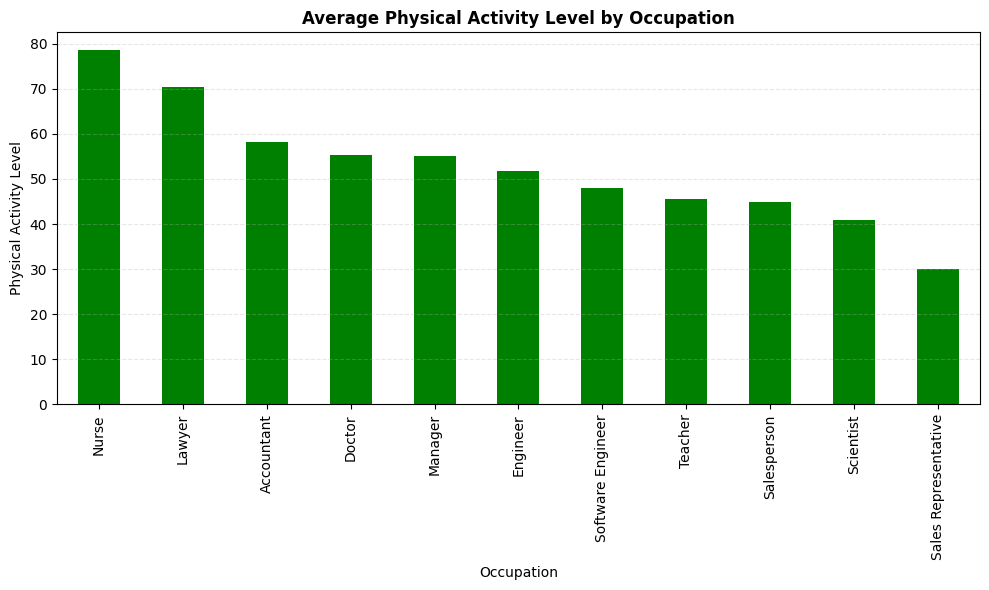

In [135]:
# Visualize occupation statistics with bar charts
plt.figure(figsize=(10, 6))

# Chart 1: Physical Activity by Occupation (sorted)
occup_stats['Physical Activity Level'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Average Physical Activity Level by Occupation', fontweight='bold')
plt.ylabel('Physical Activity Level')
plt.xlabel('Occupation')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

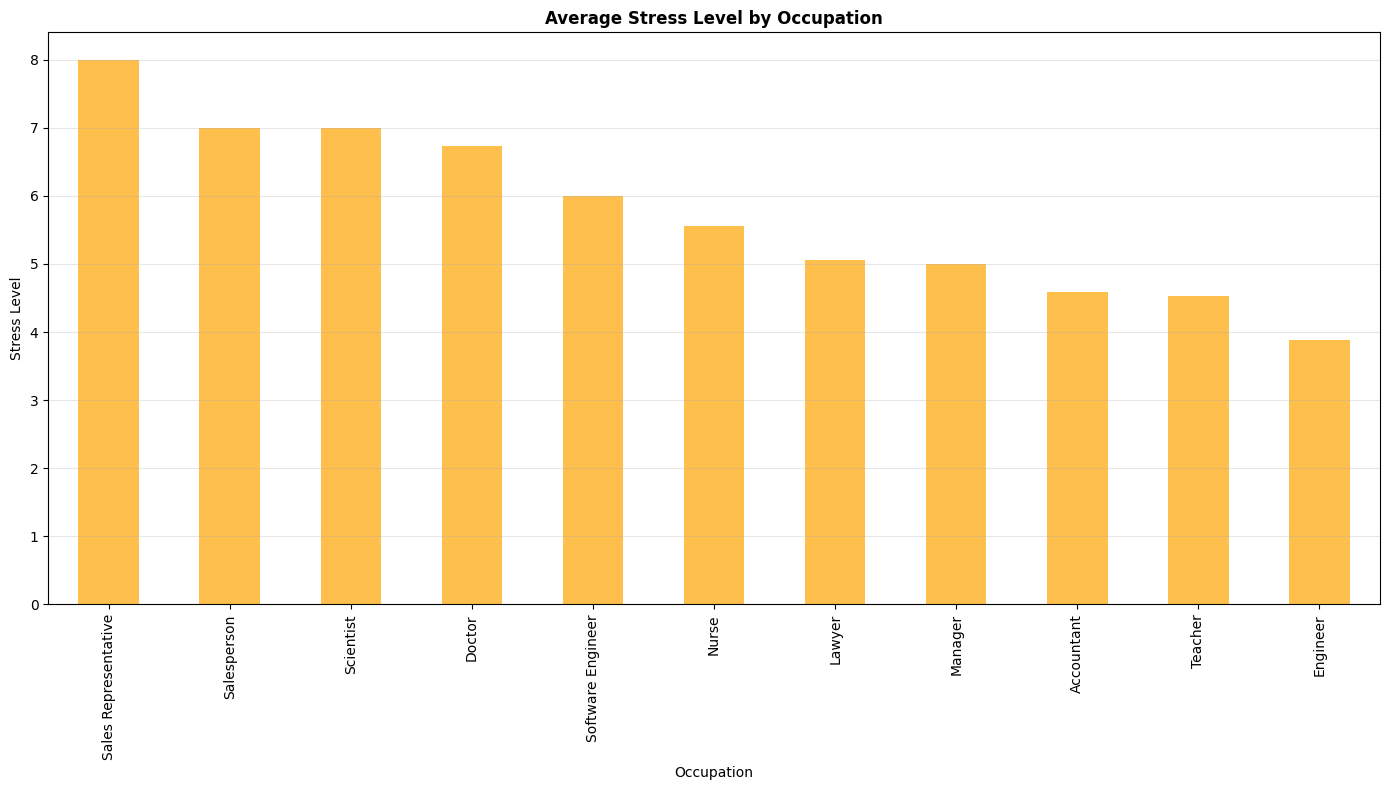

In [141]:
# Visualize occupation statistics with bar charts
plt.figure(figsize=(14, 8))

# Chart 2: Stress Level by Occupation (sorted)
occup_stats['Stress Level'].sort_values(ascending=False).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Stress Level by Occupation', fontweight='bold')
plt.ylabel('Stress Level')
plt.xlabel('Occupation')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Data Preprocessing Alignment with Aims, Objectives & Planned Analysis

### How Our 4-Step Preprocessing Supports Our Overall Aim & 3 Objectives

**Our Aim:** Understand what causes people's difficulty sleeping and insomnia by analyzing the sleep health and lifestyle dataset.

**Objective 1: Identifying the average sleep duration**
- **Missing Data Handling:** Ensures the average is calculated only from complete records, giving an unbiased population estimate (7.04 hours)
- **Outlier Detection:** Reveals whether extreme sleep values exist that might distort the average, helping us understand typical vs. unusual sleep patterns
- **Duplicate Removal:** Prevents individuals who appear multiple times from skewing the average
- **Imbalance Check:** Confirms whether occupational imbalance affects the overall average representation

**Objective 2: Analyzing how sleep duration impacts quality of sleep and stress level**
- **Missing Data Handling:** Critical—correlations require complete data across all three variables (sleep duration, quality, stress) for each individual
- **Outlier Detection:** Prevents spurious correlations driven by extreme values; ensures observed relationships are genuine population patterns
- **Duplicate Removal:** Eliminates artificial correlation strengthening from counting same person multiple times
- **Imbalance Check:** Understanding if certain occupations dominate helps us know whether correlation patterns apply broadly or to specific groups

**Objective 3: Finding which occupation has most physical activity and highest stress level**
- **Missing Data Handling:** Ensures fair occupational comparison—occupations with more missing data won't appear artificially different
- **Outlier Detection:** Prevents one outlier individual (e.g., one extremely active nurse) from making an entire occupation appear different
- **Duplicate Removal:** Essential for fair comparison—occupations with duplicate entries would appear over-represented in their statistics
- **Imbalance Check:** Directly addresses this—we now know sample size for each occupation before drawing conclusions about occupational differences

### Result: Trustworthy Analysis Foundation
Our preprocessing transforms raw data into a reliable foundation where:
- Averages reflect true population patterns (not distorted by errors/duplicates)
- Correlations reveal genuine relationships (not artifacts of data quality issues)
- Occupational comparisons are fair (not skewed by imbalance or duplicates)
- Findings about sleep difficulties are representative (based on clean, complete, unique records)